# ![lagou_logo](http://pstatic.lagou.com/www/static/common/widgets/header_c/modules/img/logo@2x_712cdaa.png)
# ** Lagou Talks on Toolsets **

### Checking your installation
You can run the following code to check the versions of the packages on your system:

(in IPython notebook, press `shift` and `return` together to execute the contents of a cell)

In [1]:
from __future__ import print_function

import IPython
print('IPython:', IPython.__version__)

import numpy as np
print('numpy:', np.__version__)

import scipy
print('scipy:', scipy.__version__)

import matplotlib
print('matplotlib:', matplotlib.__version__)

import sklearn
print('scikit-learn:', sklearn.__version__)

import pandas as pd
print('pandas', pd.__version__)

IPython: 4.0.1
numpy: 1.10.1
scipy: 0.16.0
matplotlib: 1.5.0
scikit-learn: 0.17
pandas 0.17.1


In [2]:
import locale
locale.getdefaultlocale()

('en_US', 'UTF-8')

### **Quick start**
#### Here are a few commends to get started.

In [3]:
import os

# Importing and parsing data
url = 'https://www.kaggle.com/c/titanic/download/train.csv'
addr = os.path.join(os.getcwd(), 'train.csv')
titanic = pd.read_csv(addr)
#titanic = pd.read_csv(addr, dtype={'Age': int})

# Computation on columns
titanic.Age.mean()

29.69911764705882

#### Exploration of dataframe
- `dataframe.dtypes` gives a list of data type info of all the attributes
- `dataframe.head(n)` shows the top `n` rows/samples of all the dataset, `dataframe.tail(n)` is similar but shows in descendend order from the last rows.
- `pandas` also provides lots of functionality on columns transformation. like `astype(type)`, `groupby(columns)`, `dropna()`, `fillna()`, `as_matrix()` and `tolist()` ,etc.

In [5]:
# Datatype
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
# Visualizations
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [6]:
# Transforming columns
titanic['Gender'] = titanic['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# Aggregations
print (titanic.groupby('Pclass').aggregate(np.mean))

# Create models
X = titanic.as_matrix(columns = ['Pclass','Gender','Fare'])
y = titanic['Survived'].tolist()

from sklearn import linear_model
clf = linear_model.SGDClassifier()
clf.fit(X,y)

        PassengerId  Survived        Age     SibSp     Parch       Fare  \
Pclass                                                                    
1        461.597222  0.629630  38.233441  0.416667  0.356481  84.154687   
2        445.956522  0.472826  29.877630  0.402174  0.380435  20.662183   
3        439.154786  0.242363  25.140620  0.615071  0.393075  13.675550   

          Gender  
Pclass            
1       0.564815  
2       0.586957  
3       0.706721  


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Gender         891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


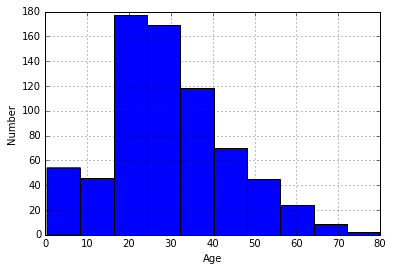

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

titanic['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Number')
plt.show()

seaborn 0.6.0


//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


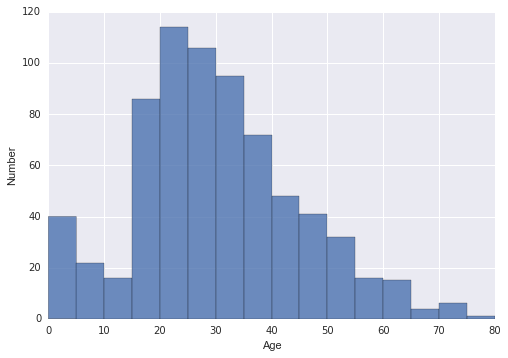

In [10]:
import seaborn
print('seaborn', seaborn.__version__)
titanic['Age'].dropna().hist(bins=16, range=(0,80), alpha = .8)
plt.xlabel('Age')
plt.ylabel('Number')
plt.show()

In [11]:
print (titanic.groupby('Gender').aggregate(np.mean))

        PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Gender                                                                   
0        431.028662  0.742038  2.159236  27.915709  0.694268  0.649682   
1        454.147314  0.188908  2.389948  30.726645  0.429809  0.235702   

             Fare  
Gender             
0       44.479818  
1       25.523893  


In [12]:
median_ages = np.zeros((2,3))

for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = titanic[(titanic['Gender'] == i) & \
                              (titanic['Pclass'] == j+1)]['Age'].dropna().median()

median_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

In [13]:
titanic['AgeFill'] = titanic['Age']

titanic[ titanic['Age'].isnull() ][['Gender','Pclass','Age', 'AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,NaN
17,1,2,NaN,NaN
19,0,3,NaN,NaN
26,1,3,NaN,NaN
28,0,3,NaN,NaN
29,1,3,NaN,NaN
31,0,1,NaN,NaN
32,0,3,NaN,NaN
36,1,3,NaN,NaN
42,1,3,NaN,NaN


In [14]:
for i in range(0, 2):
    for j in range(0, 3):
        titanic.loc[ (titanic.Age.isnull()) & (titanic.Gender == i) & (titanic.Pclass == j+1),\
                'AgeFill'] = median_ages[i,j]

titanic[ titanic['Age'].isnull() ][['Gender','Pclass','Age', 'AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0
31,0,1,NaN,35.0
32,0,3,NaN,21.5
36,1,3,NaN,25.0
42,1,3,NaN,25.0


#### Feature Engineering
Let's create a feature that records whether the `Age` was originally missing. This is relatively simple by allowing `pandas` to use the integer conversion of the `True/False` evaluation of its built-in function, `pandas.isnull()`

In [15]:
titanic['AgeIsNull'] = pd.isnull(titanic.Age).astype(int)

Let's also create a couple of other features, this time using simple math on existing columns. 
- Since we know that `Parch` is the number of parents or children onboard, and `SibSp` is the number of siblings or spouses, we could collect those together as a `FamilySize`
- We can also create artificial features if we think it may be advantageous to a machine learning algorithm. For example, we know `Pclass` had a large effect on survival, and it's possible `Age` will too. One artificial feature could incorporate whatever predictive power might be available from both `Age` and `Pclass` by multiplying them. 

In [16]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']
titanic['Age*Class'] = titanic.AgeFill * titanic.Pclass

In [17]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill,AgeIsNull,FamilySize,Age*Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,22.0,0,1,66.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0,38.0,0,1,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0,0,0,78.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0,35.0,0,1,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,35.0,0,0,105.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,25.0,1,0,75.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,1,54.0,0,0,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,1,2.0,0,4,6.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,0,27.0,0,2,81.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,0,14.0,0,1,28.0


We have our data almost ready for machine learning. But most basic ML techniques will not work on strings, and in python they almost always require the data to be an array-- the implementations we will see in the `sklearn` package are not written to use a pandas dataframe. 

So the last two things we need to do are 
- (1) determine what columns we have left which are not numeric, and 
- (2) send our `pandas.DataFrame` back to a `numpy.array`.

In [18]:
# we can require .dtypes to show only the columns which are 'object', which for pandas means it has strings:
print (titanic.dtypes[titanic.dtypes.map(lambda x: x=='object')])

train_data = titanic.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1) 

train_data = train_data.drop(['Age', 'PassengerId'], axis = 1)
# Alternative to drop 'Age'
# df = df.dropna()

train_data = train_data.as_matrix()
train_data

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object


array([[  0. ,   3. ,   1. , ...,   0. ,   1. ,  66. ],
       [  1. ,   1. ,   1. , ...,   0. ,   1. ,  38. ],
       [  1. ,   3. ,   0. , ...,   0. ,   0. ,  78. ],
       ..., 
       [  0. ,   3. ,   1. , ...,   1. ,   3. ,  64.5],
       [  1. ,   1. ,   0. , ...,   0. ,   0. ,  26. ],
       [  0. ,   3. ,   0. , ...,   0. ,   0. ,  96. ]])

### Classification Example
K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

Let's try it out on our iris classification problem:

In [19]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict([[3, 5, 4, 2],])

print(iris.target_names[result])
# You can also do probabilistic predictions:
print(knn.predict_proba([[3, 5, 4, 2],]))

['versicolor']
[[ 0.   0.8  0.2]]


In [20]:
def plot_iris_knn(n_neighbors=3, pca=False):
    import pylab as pl
    from matplotlib.colors import ListedColormap
    # Create color maps for 3-class classification problem
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    iris = datasets.load_iris()
    if pca == False:
        X = iris.data[:, :2]  # we only take the first two features. We could
                        # avoid this ugly slicing by using a two-dim dataset
        y = iris.target
    else:
        from sklearn.decomposition import PCA
        pca = PCA(n_components=2)
        X, y = iris.data, iris.target
        pca.fit(X)
        X = pca.transform(X)
        
    knn = neighbors.KNeighborsClassifier(n_neighbors)
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    if pca:
        pl.xlabel('principle component no.1')
        pl.ylabel('principle component no.2')
    else:
        pl.xlabel('sepal length (cm)')
        pl.ylabel('sepal width (cm)')
    pl.axis('tight')

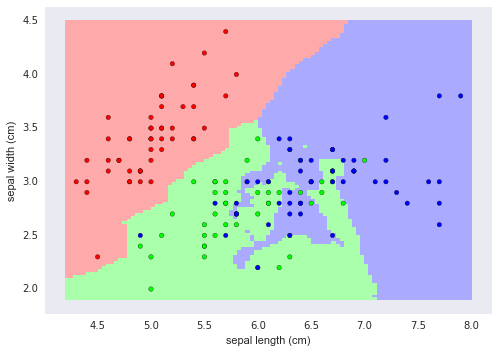

In [24]:
plot_iris_knn(3)

We can also try to find the combinations of variables that explain the most variance using *PCA*.

Consider the iris dataset. It cannot be visualized in a single 2D plot, as it has 4 features. We are going to extract 2 combinations of sepal and petal dimensions to visualize it:

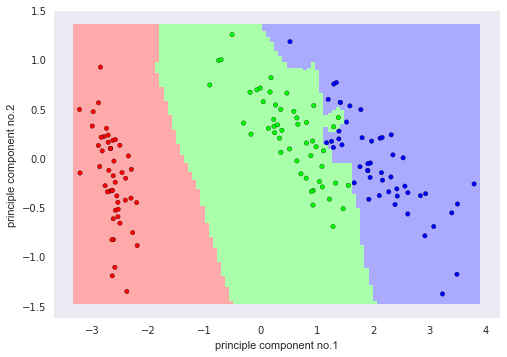

In [28]:
plot_iris_knn(1,pca=True)

#### Other Dimensionality Reducting Routines
Note that scikit-learn contains many other unsupervised dimensionality reduction routines: some you might wish to try are Other dimensionality reduction techniques which are useful to know about:

- [sklearn.decomposition.PCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.PCA.html): Principal Component Analysis
- [sklearn.decomposition.RandomizedPCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.RandomizedPCA.html): extremely fast approximate PCA implementation based on a randomized algorithm
- [sklearn.decomposition.SparsePCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.SparsePCA.html): PCA variant including L1 penalty for sparsity
- [sklearn.decomposition.FastICA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.FastICA.html): Independent Component Analysis
- [sklearn.decomposition.NMF](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.NMF.html): non-negative matrix factorization
- [sklearn.manifold.LocallyLinearEmbedding](http://scikit-learn.org/0.13/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html): nonlinear manifold learning technique based on local neighborhood geometry
- [sklearn.manifold.IsoMap](http://scikit-learn.org/0.13/modules/generated/sklearn.manifold.Isomap.html): nonlinear manifold learning technique based on a sparse graph algorithm

#### Validation Sets
Above we made the mistake of testing our data on the same set of data that was used for training. This is not generally a good idea. If we optimize our estimator this way, we will tend to over-fit the data: that is, we learn the noise.

A better way to test a model is to use a hold-out set which doesn't enter the training. `sklearn.cross_validation` offers various functions that can be used to reach our target. Also, functions from `sklearn.metrics` can help give numerical criteria on whether the learning model is successful:

In [29]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

X, y = iris.data, iris.target
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)
print(confusion_matrix(ytest, ypred))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

1.0

This can also be computed directly from the model.score method:

In [31]:
knn.score(Xtest, ytest)

1.0

In [32]:
for n_neighbors in [1, 5, 10, 20, 30]:
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(Xtrain, ytrain)
    print(n_neighbors, knn.score(Xtest, ytest))

1 1.0
5 1.0
10 0.973684210526
20 0.947368421053
30 0.973684210526


Let's see some other functionality package in sklearn:
- `sklearn.preprocessing`: provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.
- `sklearn.pipeline`: implements utilities to build a composite estimator, as a chain of transforms and estimators.
- `sklearn.learning_curve`: utilities to evaluate models with respect to a variable.

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

To illustrate these function, we introduce a problem that has long history, which is *overfitting*.

We'll create a simple nonlinear function that we'd like to fit

In [34]:
def test_func(x, err=0.5):
    y = 10 - 1. / (x + 0.1)
    if err > 0:
        y = np.random.normal(y, err)
    return y

def make_data(N=40, error=1.0, random_seed=1):
    # randomly sample the data
    np.random.seed(1)
    X = np.random.random(N)[:, np.newaxis]
    y = test_func(X.ravel(), error)
    
    return X, y

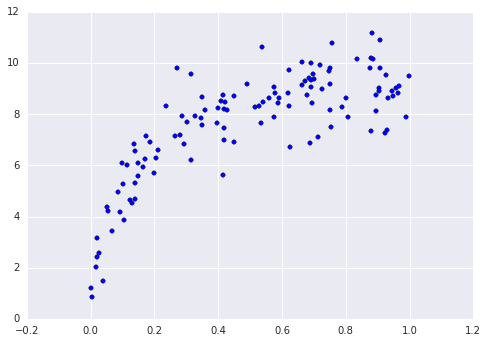

In [35]:
X, y = make_data(120, error=1.0)
plt.scatter(X, y);

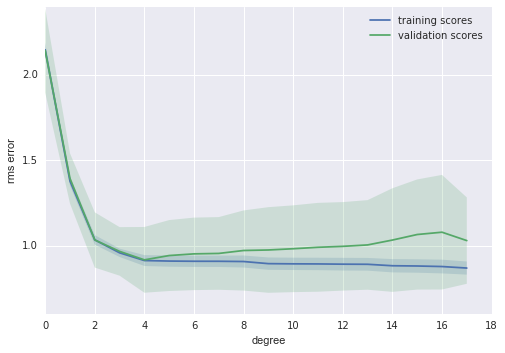

In [36]:
from sklearn.learning_curve import validation_curve

def rms_error(model, X, y):
    y_pred = model.predict(X)
    return np.sqrt(np.mean((y - y_pred) ** 2))

degree = np.arange(0, 18)
val_train, val_test = validation_curve(PolynomialRegression(), X, y,
                                       'polynomialfeatures__degree', degree, cv=7,
                                       scoring=rms_error)

def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)

plot_with_err(degree, val_train, label='training scores')
plot_with_err(degree, val_test, label='validation scores')
plt.xlabel('degree'); plt.ylabel('rms error')
plt.legend();

Notice the trend here, which is common for this type of plot.

- For a small model complexity, the training error and validation error are very similar. This indicates that the model is __under-fitting__ the data: it doesn't have enough complexity to represent the data. Another way of putting it is that this is a __high-bias__ model.

- As the model complexity grows, the training and validation scores diverge. This indicates that the model is __over-fitting__ the data: it has so much flexibility, that it fits the noise rather than the underlying trend. Another way of putting it is that this is a __high-variance__ model.

- Note that the training score (nearly) always improves with model complexity. This is because a more complicated model can fit the noise better, so the model improves. The validation data generally has a sweet spot, which here is around 5 terms.

### Recap: Scikit-learn's estimator interface
Scikit-learn strives to have a uniform interface across all methods, and we'll see examples of these below. Given a scikit-learn estimator object named model, the following methods are available:

- Available in all Estimators
    - `model.fit()` : fit training data. For supervised learning applications, this accepts two arguments: the data X and the labels y (e.g. `model.fit(X, y)`). For unsupervised learning applications, this accepts only a single argument, the data X (e.g. `model.fit(X)`).
- Available in supervised estimators
    - `model.predict()` : given a trained model, predict the label of a new set of data. This method accepts one argument, the new data X_new (e.g. `model.predict(X_new)`), and returns the learned label for each object in the array.
    - `model.predict_proba()` : For classification problems, some estimators also provide this method, which returns the probability that a new observation has each categorical label. In this case, the label with the highest probability is returned by `model.predict()`.
    - `model.score()` : for classification or regression problems, most estimators implement a score method. Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in unsupervised estimators
    - `model.predict()` : predict labels in clustering algorithms.
    - `model.transform()` : given an unsupervised model, transform new data into the new basis. This also accepts one argument X_new, and returns the new representation of the data based on the unsupervised model.
    - `model.fit_transform()` : some estimators implement this method, which more efficiently performs a fit and a transform on the same input data.